importovanie potrebných knižníc

In [154]:
import numpy as np
from matplotlib import pyplot as plt

`string2list(zoz)`
rozdelí string po cifrách  

Cieľ: príprava na prácu, získanie dát v správnom formáte na ďalšie používanie

In [155]:
def string2list(zoz: str) -> list:
    """
    Príprava na prácu - string na list

    Argumenty:
        `zoz` : string z 0 a 1

    Returns: 
        list of `np.ndarray` -> `[array([...])]` : prepísaný string
    """
    fin = []
    zoz = zoz.split("\n")
    elem = [int(x) for x in zoz if x != '' and x != ' '] 
    #elem = [int(x) for x in zoz]
    for i in range(0, len(elem)):
        pom = []
        for x in zoz[i]:
            if x != '' and x != ' ':
                if int(x) == 1 or int(x) == 0:
                #if int(x) == 1 or int(x) == 0:
                    pom.append(int(x))
                else:
                    raise ValueError("char nie je 0 ani 1")
        #fin.append(np.array(pom))
        fin.append(pom)
    return fin

In [156]:
#príklad - spávny
print(string2list('0100110'))

[[0, 1, 0, 0, 1, 1, 0]]


príklad - nesprávny
print(string2list('102001'))

`showBits()` 
vykreslenie bitov s možnosťou vykreslenia rozdielnych bitov - použite v `draw()`  

Cieľ: pomôcka na vizualizáciu dát/bitov

In [157]:
#def showBits(matrixOfBits: np.uint8, showDiffs=False, zoom=1) -> None:
"""
    Vykreslenie bitov

    Argumenty:
        `matrixOfBits` : NumPy pole(array), obsahujúce len 1, 0
        `showDiffs` : bool, ak nie je definovaný automaticky False
        `zoom` : int, ak nie je definovaný automaticky 1
    
    Result:
        obrázok : 
        1 : žltá  
        0 : fialová  
        nastavený `showDiffs` : vykreslí ešte jeden obrázok, kde sú fialovým označené, že daný bit nadobúda rôzne hodnoty
    
    if not showDiffs:
        plt.figure(figsize=np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7)
        plt.imshow(matrixOfBits, aspect='auto')  
        plt.xlabel('x')  

        x_ticks_positions = np.arange(0, matrixOfBits.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        plt.xticks(x_ticks_positions, x_ticks_labels, rotation='vertical') 

        plt.show()
    else:
        row_height_parameter = 1.0 

        fig, axs = plt.subplots(2, figsize=np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7, gridspec_kw={'height_ratios': [len(matrixOfBits), row_height_parameter]})

        axs[0].imshow(matrixOfBits, aspect='auto')

        x_ticks_positions = np.arange(0, matrixOfBits.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        axs[0].set_xticks(x_ticks_positions)
        axs[0].set_xticklabels(x_ticks_labels, rotation='vertical')
        axs[0].get_xaxis().set_visible(False)

        same = np.all(matrixOfBits[0, :] == matrixOfBits, axis=0).reshape((1, matrixOfBits.shape[1]))

        axs[1].imshow(same, aspect='auto')
        axs[1].set_xlabel('x')
        axs[1].get_yaxis().set_visible(False)

        x_ticks_positions = np.arange(0, same.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        axs[1].set_xticks(x_ticks_positions)
        axs[1].set_xticklabels(x_ticks_labels, rotation='vertical')

        plt.show()
"""

import matplotlib.pyplot as plt
import numpy as np

def showBits(matrixOfBits: np.ndarray, showDiffs: bool = False, zoom: int = 1) -> None:
    """
    Vykreslenie bitov

    Argumenty:
        `matrixOfBits` : NumPy pole(array), obsahujúce len 1, 0
        `showDiffs` : bool, ak nie je definovaný automaticky False
        `zoom` : int, ak nie je definovaný automaticky 1
    
    Result:
        obrázok : 
        1 : žltá  
        0 : fialová  
        nastavený `showDiffs` : vykreslí ešte jeden obrázok, kde sú fialovým označené, že daný bit nadobúda rôzne hodnoty
    """
    x_length = matrixOfBits.shape[1]
    if x_length > 2**16:
        num_parts = (x_length + 2**16 - 1) // 2**16
        part_length = x_length // num_parts
        for i in range(num_parts):
            plt.figure(figsize=(np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7)[0])
            start_idx = i * part_length
            end_idx = min((i + 1) * part_length, x_length)
            plot_data = matrixOfBits[:, start_idx:end_idx]
            plot_part(plot_data, showDiffs, zoom)
    else:
        plot_part(matrixOfBits, showDiffs, zoom)

def plot_part(matrixOfBits, showDiffs, zoom):
    if not showDiffs:
        plt.figure(figsize=np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7)
        plt.imshow(matrixOfBits, aspect='auto')  
        plt.xlabel('x')  

        x_ticks_positions = np.arange(0, matrixOfBits.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        plt.xticks(x_ticks_positions, x_ticks_labels, rotation='vertical') 

        plt.show()
    else:
        row_height_parameter = 1.0 

        fig, axs = plt.subplots(2, figsize=np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7, gridspec_kw={'height_ratios': [len(matrixOfBits), row_height_parameter]})

        axs[0].imshow(matrixOfBits, aspect='auto')

        x_ticks_positions = np.arange(0, matrixOfBits.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        axs[0].set_xticks(x_ticks_positions)
        axs[0].set_xticklabels(x_ticks_labels, rotation='vertical')
        axs[0].get_xaxis().set_visible(False)

        same = np.all(matrixOfBits[0, :] == matrixOfBits, axis=0).reshape((1, matrixOfBits.shape[1]))

        axs[1].imshow(same, aspect='auto')
        axs[1].set_xlabel('x')
        axs[1].get_yaxis().set_visible(False)

        x_ticks_positions = np.arange(0, same.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        axs[1].set_xticks(x_ticks_positions)
        axs[1].set_xticklabels(x_ticks_labels, rotation='vertical')

        plt.show()




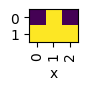

In [158]:
zoz = [[0, 1, 0], [1, 1, 1]]
fin = np.array(zoz).astype(np.uint8)
showBits(fin)

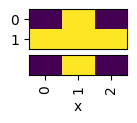

In [159]:
zoz = [[0, 1, 0], [1, 1, 1]]
fin = np.array(zoz).astype(np.uint8)
showBits(fin, True, 2)

`draw()`
spustí vykreslenie bitov a zabezpečí správne formátovanie dát pre `showBits()`  

Cieľ: vizuálna analýza dát/bitov

In [160]:
def draw(zoz: list, showDiffs=False, zoom=1) -> None:
    """
    Argumenty:
        `zoz` : list array listov, obsahujú len 1, 0
        `showDiffs` : bool, ak nie je definovaný automaticky False
        `zoom` : int, ak nie je definovaný automaticky 1

    Result:
        obrázok pomocou `showBits()`
        1 : žltá  
        0 : fialová  
        nastavený `showDiffs` : vykreslí ešte jeden obrázok, kde sú fialovým označené, že daný bit nadobúda rôzne hodnoty
    """
    #print(zoz)
    m = max(zoz, key=len)
    max_length = len(m)

    for i in range(0, len(zoz)):
        while len(zoz[i]) < max_length:
            zoz[i] = np.append(zoz[i], 0)

    image = np.array(zoz).astype(np.uint8)
    showBits(image, showDiffs, zoom)

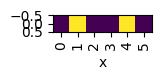

In [161]:
#príklad
zoz = "010010"
fin = string2list(zoz)

draw(fin)

`showBitsAdv()` 
použitie v drawAdv()  
vykreslenie bitov, zvýraznenie v obrázku (možnosť kombinovať zvýraznenie):    
    button bit -> modrá  
    separator bit -> zelená   
    id -> šedá  
    1 -> žltá  
    0 -> fialová  

Cieľ: pomôcka na vizualizáciu dát/bitov - so zvýraznením na dôležité bity

In [162]:
def showBitsAdv(matrixOfBits: np.uint8, button: list = [], separator: list = [], id: list = [], showDiffs=False, zoom=1) -> None:
    """
    Vykreslenie obrázka so zvýraznením podstatných bitov
    
    Argumenty:
        `matrixOfBits` : NumPy pole(array), obsahujú len 1, 0  
        `button` : list pozícii vybraných bitov  
        `separator` : list pozícii vybraných bitov  
        `id` : list pozícii vybraných bitov  
        `showDiffs` : bool, ak nie je definovaný automaticky False
        `zoom` : int, ak nie je definovaný automaticky 1  

    Výsledok:
        obrázok : 
        button bit : modrá  
        separator bit : zelená   
        id : šedá  
        1 : žltá  
        0 : fialová
        nastavený `showDiffs` : vykreslí ešte jeden obrázok, kde sú fialovým označené, že daný bit nadobúda rôzne hodnoty  
    """
    
    print('blue - button, green - separator, grey - id')
    if not showDiffs:
        plt.figure(figsize=np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7)

        colorMatrix = np.zeros((matrixOfBits.shape[0], matrixOfBits.shape[1], 3), dtype=int)

        color_map = {0: np.array([68, 1, 84]), # purple
                    1: np.array([0, 0, 200]), # blue
                    2: np.array([0, 200, 0]), # green
                    3: np.array([253, 231, 36]), # yellow
                    4: np.array([50, 50, 50])} # grey

        for i in range(matrixOfBits.shape[0]):
            for j in range(matrixOfBits.shape[1]):
                if j < len(button) and button[j] == 1:
                    colorMatrix[i][j] = color_map[1]
                elif j < len(separator) and separator[j] == 1:
                    colorMatrix[i][j] = color_map[2]
                elif j < len(id) and id[j] == 1:
                    colorMatrix[i][j] = color_map[4]
                else:
                    if np.all(matrixOfBits[i, j] == 0):
                        colorMatrix[i][j] = color_map[0]
                    elif np.array_equal(matrixOfBits[i, j], 1):
                        colorMatrix[i][j] = color_map[3]
                

        plt.imshow(colorMatrix)
        plt.xlabel('x') 

        x_ticks_positions = np.arange(0, matrixOfBits.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        plt.xticks(x_ticks_positions, x_ticks_labels, rotation='vertical') 

        plt.show()
    
    else:
        plt.figure(figsize=np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7)

        colorMatrix = np.zeros((matrixOfBits.shape[0], matrixOfBits.shape[1], 3), dtype=int)

        color_map = {0: np.array([68, 1, 84]), # purple
                    1: np.array([0, 0, 200]), # blue
                    2: np.array([0, 200, 0]), # green
                    3: np.array([253, 231, 36]), # yellow
                    4: np.array([50, 50, 50])} # grey

        for i in range(matrixOfBits.shape[0]):
            for j in range(matrixOfBits.shape[1]):
                if j < len(button) and button[j] == 1:
                    colorMatrix[i][j] = color_map[1]
                elif j < len(separator) and separator[j] == 1:
                    colorMatrix[i][j] = color_map[2]
                elif j < len(id) and id[j] == 1:
                    colorMatrix[i][j] = color_map[4]
                else:
                    if np.all(matrixOfBits[i, j] == 0):
                        colorMatrix[i][j] = color_map[0]
                    elif np.array_equal(matrixOfBits[i, j], 1):
                        colorMatrix[i][j] = color_map[3]

        plt.imshow(colorMatrix)
        plt.xlabel('x')

        x_ticks_positions = np.arange(0, matrixOfBits.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        plt.xticks(x_ticks_positions, x_ticks_labels, rotation='vertical')

        row_height_parameter = 1.0

        fig, axs = plt.subplots(2, figsize=np.flip(np.array(matrixOfBits.shape)) / 8 * zoom * 1.7, gridspec_kw={'height_ratios': [len(matrixOfBits), row_height_parameter]})

        axs[0].imshow(matrixOfBits, aspect='auto')

        x_ticks_positions = np.arange(0, matrixOfBits.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        axs[0].set_xticks(x_ticks_positions)
        axs[0].set_xticklabels(x_ticks_labels, rotation='vertical')
        axs[0].get_xaxis().set_visible(False)

        same = np.all(matrixOfBits[0, :] == matrixOfBits, axis=0).reshape((1, matrixOfBits.shape[1]))

        axs[1].imshow(same, aspect='auto')
        axs[1].set_xlabel('x')
        axs[1].get_yaxis().set_visible(False)

        x_ticks_positions = np.arange(0, same.shape[1], 1)
        x_ticks_labels = [str(i) for i in x_ticks_positions]
        axs[1].set_xticks(x_ticks_positions)
        axs[1].set_xticklabels(x_ticks_labels, rotation='vertical')

        plt.show()


blue - button, green - separator, grey - id


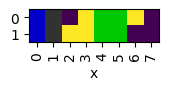

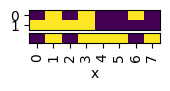

In [163]:
# príklad
zoz = [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 1, 1, 0, 0, 0, 0]]
buttonBit = [1, 0, 0, 0, 0, 0, 0, 0]
separatorBit = [0, 0, 0, 0, 1, 1, 0, 0]
idBit = [0, 1, 0, 0, 0, 0, 0, 0]
fin = np.array(zoz).astype(np.uint8)
buttonBitFin = np.array(buttonBit).astype(np.uint8)
separatorBitFin = np.array(separatorBit).astype(np.uint8)
idBitFin = np.array(idBit).astype(np.uint8)

showBitsAdv(fin, buttonBitFin, separatorBitFin, idBitFin, True)

`drawAdv()` 
vykreslí obrázok s vyznačenými bitmi pre separator, id, button bit  
zabezpečí správne formátovanie dát pre showBitsAdv()  

Cieľ: vizuálna analýza dát/bitov - so zvýraznením na dôležité bity

In [164]:
def drawAdv(zoz: list, button: list, separator: list, id: list, showDiffs=False, zoom=1) -> None:
    """
    Vykreslenie obrázka so zvýraznením podstatných bitov
    
    Argumenty:
        `zoz` : list listov, osahuje len 1, 0
        `button` : list pozícii vybraných bitov
        `separator` : list pozícii vybraných bitov
        `id` : list pozícii vybraných bitov
        `showDiffs` : bool, ak nie je definovaný automaticky False
        `zoom` : int, ak nie je definovaný automaticky 1  

    Výsledok:
        obrázok : 
        button bit : modrá  
        separator bit : zelená   
        id : šedá  
        1 : žltá  
        0 : fialová  
        nastavený `showDiffs` : vykreslí ešte jeden obrázok, kde sú fialovým označené, že daný bit nadobúda rôzne hodnoty  
    """
    
    max_length = len(max(zoz, key=len))

    if set(button) != set([1, 0]) and set(button) != set([0]) and set(button) != set([1]):
        raise ValueError("button - char nie je 0 ani 1")
    
    if set(separator) != set([1, 0]) and set(separator) != set([0]) and set(separator) != set([1]):
        raise ValueError("separator - char nie je 0 ani 1")
    
    if set(id) != set([1, 0]) and set(id) != set([0]) and set(id) != set([1]):
        raise ValueError("id - char nie je 0 ani 1")

    for i in range(0, len(zoz)):
        if set(zoz[i]) != set([1, 0]) and set(zoz[i]) != set([0]) and set(zoz[i]) != set([1]):
            raise ValueError("zoz - char nie je 0 ani 1")
        while len(zoz[i]) < max_length:
            zoz[i] = np.append(zoz[i], 0)

    while len(button) < max_length or len(separator) < max_length or len(id) < max_length :
        if len(button) < max_length:
            button = np.append(button, 0)
    
        if len(separator) < max_length:
            separator = np.append(separator, 0)
    
        if len(id) < max_length:
            id = np.append(id, 0)


    image = np.array(zoz).astype(np.uint8)
    buttons = np.array(button).astype(np.uint8) 
    sep = np.array(separator).astype(np.uint8) 
    idF = np.array(id).astype(np.uint8) 

    showBitsAdv(image, buttons, sep, idF, showDiffs, zoom)

blue - button, green - separator, grey - id


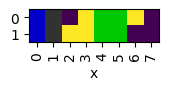

In [165]:
# príklad - správne
zoz = [[0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 1, 1, 0, 0, 0, 0]]
buttonBit = [1, 0, 0, 0, 0, 0, 0, 0]
separatorBit = [0, 0, 0, 0, 1, 1, 0, 0]
idBit = [0, 1, 0, 0, 0, 0, 0, 0]

drawAdv(fin, buttonBit, separatorBit, idBit)

príklad - nesprávne

In [166]:
zoz = [[0, 1, 0, 1, 2, 0, 1, 0], [1, 1, 1, 1, 0, 0, 0, 0]]
buttonBit = [1, 0, 0, 0, 0, 0, 0, 0]
separatorBit = [0, 0, 0, 0, 1, 1, 0, 0]
idBit = [0, 1, 0, 0, 0, 0, 0, 0]

drawAdv(zoz, buttonBit, separatorBit, idBit)

ValueError: zoz - char nie je 0 ani 1

`separateSignal()` 
pomôcka pre ďalšie metódy, vráti list s vysielanými signálmi, rozdelený podľa počtu núl (možnosť upraviť pri volaní funkcie) a bez zbytočných núl  

Cieľ: rozdelí každý vyslaný signál na sekvencie (medzi dvoma je viac ako 2 núl) a každú sekvenciu očistí od zbytočných začiatočných a koncových núl

In [167]:
def separateSignal(zoz: list, num: int = 3) -> list:
    """
    Vráti len podstatné informácie, vynechá zbytočné nuly
    
    Argumenty:
        `zoz` : list listov, obsahuje len 0, 1
        `num` : int, počet núl určujúcich rozdelenie
 
    Výsledok:
        list listov upravený
    
    """
    
    fin = []
    for i in range(0, len(zoz)):
        if set(zoz[i]) != set([1, 0]) and set(zoz[i]) != set([1]) and set(zoz[i]) != set([0]):
            raise ValueError("zoz - char nie je 0 ani 1")
        
        pom = ''
        for j in range(0, len(zoz[i])):
            pom += str(zoz[i][j])
        
        pom = pom.split('0'*num)
        pom = list(filter(None, pom))
        pom = list(filter(lambda x: x != '0', pom))
        for j in range(0, len(pom)):
            pom[j] = pom[j].lstrip('0')
        
        pom2 = []
        for j in range(0, len(pom)):
            pomElem = [int(x) for x in pom[j]]
            if pomElem != []:
                pom2.append([int(x) for x in pom[j]])
        if pom2 != [] and pom2 not in fin:
            fin.append(pom2)
    return fin

In [168]:
# príklad - správne
inputStr = "0000110101000011010101001001"
zoz = string2list(inputStr)
fin = separateSignal(zoz)

print(fin)

[[[1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]]]


`findSameSignal()` 
vypíše sekvencie, ktoré boli opakované pri každom vyslaní signálu. Na vstupe je list signálov z jedného vysielača. Predpoklad, že budú tieto sekvencie oddelené nejakým počtom núl.

Cieľ: nájdenie pravdepodobnej inicializačnej sekvencie daného vysielača

In [169]:
def findSameSignal(zoz: list) -> list:
    """
    Vráti list sekvencií signálu, ktoré vysiela vysielač pri každom vyslaní signálu, predpoklad  - je oddelený od zvyšku signálu.

    Argumenty:
        `zoz` : list listov
    
    Výsledok:
        list listov - opakujúcich sa sekvencií
    """
    
    repeated = []
    fin = separateSignal(zoz)

    for i in range(0, len(fin)):
        for j in range(0, len(fin[i])):
            for k in range(0, len(fin)):
                if k != i and fin[i][j] in fin[k] and fin[i][j] not in repeated:
                    repeated.append(fin[i][j])
    
    return repeated
    


In [170]:
# príklad - správne
inputStr = "0000110101000011010101001001\n000011010100001011010011"
zoz = string2list(inputStr)
fin = findSameSignal(zoz)

print(fin)

[[1, 1, 0, 1, 0, 1]]


In [171]:
# príklad - správne
inputStr = """000011010100000011000010011010101001001\n000011010100011000010110100110000000000"""
zoz = string2list(inputStr)
fin = findSameSignal(zoz)

print(fin)

[[1, 1, 0, 1, 0, 1], [1, 1]]


príklad - nesprávne

In [173]:
zoz = [[0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
fin = findSameSignal(np.array(zoz))

print(fin)

ValueError: zoz - char nie je 0 ani 1

`findSameSignalMulti()` 
vypíše sekvencie, ktoré sa objavili pri obidvoch vysielačoch. Predpoklad, že budú oddelené nejakým počtom núl od zvyšku signálu.  

Cieľ: či sa opakuje inicializačný signál pri rôznych vysielačoch.

In [174]:
def findSameSignalMulti(zozA: list, zozB: list) -> list:
    """
    Vráti rovnaké sekvencie z obidvoch vysielačov.

    Argumenty: zoz1, zoz2 nemusia mať rovnaký počet listov
        `zoz1` : list listov, len 1, 0   
        `zoz2` : list listov, len 1, 0
    
    
    Výsledok:
        listy nachádzajúce sa aj v zoz1 aj v zoz2
    """
    
    zoz1 = findSameSignal(zozA)
    zoz2 = findSameSignal(zozB)
    
    if zoz1 == [] and zoz2 == []:
        zoz1 = zozA
        zoz2 = zozB
    
    fin = []
    for i in range(0, len(zoz1)):
        if zoz1[i] in zoz2 and zoz1[i] not in fin:
            fin.append(zoz1[i])
    
    for i in range(0, len(zoz2)):
        if zoz2[i] in zoz1 and zoz2[i] not in fin:
            fin.append(zoz2[i])
    
    return fin
            

In [175]:
# príklad
inputStrA = "0000110101000011010101001001\n000011010100001011010011"
zozA = string2list(inputStrA)

inputStrB = "0000110101000010010101011001\n000011010100001011010101"
zozB = string2list(inputStrB)

fin = findSameSignalMulti(zozA, zozB)
print(fin)


[[1, 1, 0, 1, 0, 1]]


`mySignal()` 
signál bez inicializačnej sekvencie / bez opakovaných sekvencií  

Cieľ: výber len podstatných dát na bližšiu analýzu

In [176]:
def mySignal(zoz: list) -> list:
    """
    Signál bez inicializačnej sekvencie / bez opakovaných sekvencií  

    Argumenty:
        `zoz` -> list listov
    
    Výsledok:
        upraveny list listov
    """
    
    fin = separateSignal(zoz)
    repeated = findSameSignal(zoz)
    
    for i in range(0, len(repeated)):
        for j in range(0, len(fin)):
            if repeated[i] in fin[j]:
                fin[j].remove(repeated[i])

    pom = []
    for i in range(0, len(fin)):
        if len(fin[i]) == 1:
            pom.append(fin[i][0])
            
    return pom

In [177]:
# príklad
inputStr = "0000110101000011010101001001\n000011010100001011010011"
zoz = string2list(inputStr)

fin = mySignal(zoz)
pom = []
for elem in zoz:
    pom.append(list(elem))
print("pred: ", pom)
print("po:   ", fin)

pred:  [[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]]
po:    [[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]]


`findPattern()` 
nájde celkový pattern, t.j. ktoré bity sú rovnaké pri každom signáli od vysielača.
Ak je bit rovnaký, tak vráti 1 inak 0.
- pre každý bit v signáli sa zistí či je rovnaký (1. element) a ak je, zapíše sa jeho hodnota (2. element) -> [1, 0] alebo [1, 1]
- ak nie je rovnaký -> [0, 0]

Cieľ: pomôcka na zistenie či existuje pattern, ktorý sa opakuje. Pomôže pri ďalšej analýze signálu.

In [178]:
def findPattern(zoz: list) -> list:
    '''
    `findPattern()` nájde celkový pattern, t.j. ktoré bity sú rovnaké pri každom signáli od vysielača.

    Argumenty:
        `zoz` -> list listov

    Výsledok:
        napr. `[[0, 0], [1, 0], [1, 1], ...]`     
    '''

    for i in range(0, len(zoz)):
        if set(zoz[i]) != set([0, 1]):
            raise ValueError("zoz - neobsahuje iba 0 a 1")
    
    pattern = []
    length = len(zoz[0])
    for i in range(0, length):
        same = True
        mam = zoz[0][i]
        for j in range(1, len(zoz)):
            if zoz[j][i] != mam:
                same = False
        pattern.append([1, mam] if same else [0, 0])

    return pattern


 príklad - nesprávne
zoz = [[0, 1, 2], [1, 0, 1]]
fin = findPattern(zoz)

In [179]:
# príklad - správne
inputStr = "0000110101000011010101001001\n0000110101000010110100110101"
pom = string2list(inputStr)
zoz = mySignal(pom)

fin = findPattern(zoz)
z = []
for elem in zoz:
    z.append(list(elem))
print("pred: ", z)
print("po:   ", fin)

pred:  [[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]]
po:    [[1, 1], [0, 0], [0, 0], [1, 1], [1, 0], [1, 1], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 1]]


`findPatternMulti()` 
nájde spoločný pattern dvoch vysielačov (ideálne ak sú z rovnakého zdroja - 2 tlačidlá).

Cieľ: pomôcka na zistenie patternu zariadenia.

In [180]:
def findPatternMulti(zoz1: list, zoz2: list) -> list:
    """
    Nájde pattern zariadenia. Ak sú bity rovnake - 1, inak 0.

    Argumenty:
        `zoz1` : list obsahujúci len 0, 1
        `zoz2` : list obsahujúci len 0, 1

    Výsledok:
        list 0 a 1
    """
    
    patternA = findPattern(zoz1)
    patternB = findPattern(zoz2)
    #print(patternA)
    #print(patternB)

    length = len(patternA)
    if len(patternA) != len(patternB):
        change = patternB
        if len(patternA) < len(patternB):
            change = patternA
            length = len(patternB)

        while len(change) < length:
            change.append(0)

    pattern = []
    for i in range(0, length):
        if patternA[i] == patternB[i] and patternA[i][0] == 1:
            pattern.append(1)
        else:
            pattern.append(0)
    return pattern

In [181]:
# príklad
inputStrA = "0000110101000011010101001001\n0000110101000010110100110110"
zA = string2list(inputStrA)
zozA = mySignal(zA)

inputStrB = "0000110101000010010101011001\n0000110101000010110101010011"
zB = string2list(inputStrB)
zozB = mySignal(zB)

fin = findPatternMulti(zozA, zozB)

pA = []
pB = []
for elem in zozA:
    pA.append(list(elem))
for elem in zozB:
    pB.append(list(elem))
print("pred A: ", pA)
print("pred B: ", pB)
print("po:   ", fin)


pred A:  [[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]]
pred B:  [[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]]
po:    [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [182]:
# príklad
inputStrA = "00001101010000110100110110110\n00001101010000100110100110100"
zA = string2list(inputStrA)
zozA = mySignal(zA)

inputStrB = "00001101010000100100110110110\n00001101010000110110110110110"
zB = string2list(inputStrB)
zozB = mySignal(zB)

fin = findPatternMulti(zozA, zozB)

pA = []
pB = []
for elem in zozA:
    pA.append(list(elem))
for elem in zozB:
    pB.append(list(elem))
print("pred A: ", pA)
print("pred B: ", pB)
print("po:   ", fin)


pred A:  [[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]
pred B:  [[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]]
po:    [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


`findButtonBit()` 
nájde bit prislúchajúcu informácii, ktorý button bol stlačený. Potrebuje signály vyslané z rôznych buttonov, aby mohol o tom rozhodnúť. Vráti list s 0 a 1, kde 1 hovorí o nájdenom bite.

Cieľ: označenie, ktoré bity prislúchajú buttonu.

In [183]:
def findButtonBit(zoz1: list, zoz2: list) -> list:
    """
    Nájde bity prislúchajúce buttonu.

    Argumenty:
        `zoz1` : list listov, obsajuje len 0 a 1
        `zoz2` : list listov, obsajuje len 0 a 1

    Výsledok:
        list 0 a 1, 1 - hľadaný bit, 0 zvyšné bity 
    """
    
    patternA = findPattern(zoz1)
    patternB = findPattern(zoz2)

    length = len(patternA)
    if len(patternA) != len(patternB):
        change = patternB
        if len(patternA) < len(patternB):
            change = patternA
            length = len(patternB)

        while len(change) < length:
            change.append(0)

    bit = []
    for i in range(0, length):
        if patternA[i][0] == 1 == patternB[i][0] and patternA[i][1] != patternB[i][1]:
            bit.append(1)
        else:
            bit.append(0)
    return bit

In [184]:
# príklad
inputStrA = "00001101010000110100110110110\n00001101010000100110100110100"
zA = string2list(inputStrA)
zozA = mySignal(zA)

inputStrB = "00001101010000100100110100110\n00001101010000110110110100110"
zB = string2list(inputStrB)
zozB = mySignal(zB)

fin = findButtonBit(zozA, zozB)

pA = []
pB = []
for elem in zozA:
    pA.append(list(elem))
for elem in zozB:
    pB.append(list(elem))
print("pred A: ", pA)
print("pred B: ", pB)
print("po:   ", fin)

pred A:  [[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]
pred B:  [[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]]
po:    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


`findMyPattern()` 
zjednoduší pattern zariadenia iba na časť, ktorá sa opakuje.

Cieľ: získanie dôležitých dát a ďalšie filtrovanie zbytočných dát.

In [185]:
def findMyPattern(zoz: list) -> list:
    """
    Nájdenie konktétneho patternu na ďalšie spracovanie.

    Argumenty:
        `zoz` : list celého patternu od `findPatterMulti()`, obsajuje len 0 a 1

    Výsledok:
        list 0 a 1, opakujúci sa pattern
    """
    
    frequent = []
    j = 0
    while j < len(zoz)-1:
        m = j
        n = 0
        pom = []
        while m < len(zoz)-1 and n < m and zoz[m] == zoz[n]:
            pom.append(zoz[n])
            if len(pom) > 1 and pom not in frequent:
                frequent.append(pom.copy())
            m += 1
            n += 1
        j += 1
    
    fin = []
    for i in range(0, len(frequent)):
        el = []
        el.append(frequent[i])

        num = 0
        j = 0
        while j < len(zoz):
            if zoz[j:j+len(frequent[i])] == frequent[i]:
                num += 1
                j += len(frequent[i])
            else:
                j += 1

        el.append(num)
        if el not in fin:
            fin.append(el)

    finSorted = sorted(fin, key=lambda x: (x[1], len(x[0])), reverse=True)
    #print(finSorted)
    return finSorted[0][0]

In [186]:
# príklad
inputStrA = "00001101010000110100110110110\n00001101010000100110100110100"
zA = string2list(inputStrA)
zozA = mySignal(zA)

inputStrB = "00001101010000100100110110110\n00001101010000110110110100110"
zB = string2list(inputStrB)
zozB = mySignal(zB)

pattern = findPatternMulti(zozA, zozB)
fin = findMyPattern(pattern)

pA = []
pB = []
for elem in zozA:
    pA.append(list(elem))
for elem in zozB:
    pB.append(list(elem))
print("signal A: ", pA)
print("signal B: ", pB)
print("pattern:  ", fin)

signal A:  [[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]
signal B:  [[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]]
pattern:   [1, 0, 1]


`getData()` 
dá preč bity patternu zo signálu, tým vráti len bity, ktoré sa nenachádzajú v patterne.
Tie bity v patternu označené ako 1 nebudú patriť do výsledného listu, len tie označené 0.

Cieľ: Získanie potrebných dát bez zbytočných. 

In [187]:
def getData(zoz: list, pattern: list) -> list:
    """
    Získanie dôležitých dát.

    Argumenty:
        `zoz` : list listov, obsahje len 0 a 1
        `pattern` : list obsahujúci 0 a 1
    
    Výsledok:
        list bitov zo `zoz` bez bitov patternu
    """
    
    fin = []
    getBits = []
    for i in range(0, len(pattern)):
        if pattern[i] == 0:
            getBits.append(i)

    for k in range(0, len(zoz)):
        pom = []
        for i in range(0, len(zoz[k])- len(pattern)+1, len(pattern)):
            for j in range(0, len(getBits)):
                pom.append(zoz[k][i + getBits[j]])
        fin.append(pom)

    return fin

In [188]:
# príklad
inputStrA = "00001101010000110100110110110\n00001101010000100110100110100"
zA = string2list(inputStrA)
zozA = mySignal(zA)

inputStrB = "00001101010000100100110110110\n00001101010000110110110100110"
zB = string2list(inputStrB)
zozB = mySignal(zB)

pattern = findPatternMulti(zozA, zozB)
fin = findMyPattern(pattern)

finA = getData(zozA, fin)
finB = getData(zozB, fin)

pA = []
pB = []
for elem in zozA:
    pA.append(list(elem))
for elem in zozB:
    pB.append(list(elem))
print("pred A: ", pA)
print("pred B: ", pB)
print("po A:   ", finA)
print("po B:   ", finB)

pred A:  [[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]
pred B:  [[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]]
po A:    [[1, 0, 1, 1, 1], [0, 1, 0, 1, 0]]
po B:    [[0, 0, 1, 1, 1], [1, 1, 1, 0, 1]]


`findSeparatorId()` 
nájde separátory, ktoré oddeľujú časti signálu a identifikačné bity, potenciálne bity, ktoré sú vždy identické pre každé vysielanie zariadenia a dĺžka je minimálne dva. Ak nájde dané bity, označí ich 1, inak vráti 0.

Cieľ: Nájdenie bitov, ktoré majú vždy rovnakú hodnotu nezávisle na buttonu. Vytvárajú formu vysielaného signálu. Vráti dva listy - bity separátoru a bity id.

In [189]:
def findSeparatorId(zoz1: list, zoz2: list) -> tuple:
    """
    Vráti list s vyznačenými bitmi, ktoré sú separátory.

    Argumenty:
        `zoz1` : list obsahujúci 0 a 1
        `zoz2` : list obsahujúci 0 a 1
    
    Výsledok:
        list seprátorov : 1 a 0, kde 1 - bit separátora, 0 - iný bit
        list identifikátorov : 1 a 0, kde 1 - bit id, 0 - iný bit
    """
    
    patternA = findPattern(zoz1)
    patternB = findPattern(zoz2)

    length = len(patternA)
    if len(patternA) != len(patternB):
        change = patternB
        if len(patternA) < len(patternB):
            change = patternA
            length = len(patternB)

        while len(change) < length:
            change.append(0)

    bit = []
    nums = []
    for i in range(0, length):
        if patternA[i] == patternB[i] and patternA[i][0] == 1:
            bit.append(1)
            nums.append(i)
        else :
            bit.append(0)
    sep = []
    id = []
    for i in range(0, len(nums)):
        if nums[i] + 1 in nums:
            id.append(nums[i])
        if nums[i] - 1 in nums and nums[i] not in id:
            id.append(nums[i]) 
        if nums[i] + 1 not in nums and nums[i] - 1 not in nums:
            sep.append(nums[i])
    
    sepFin = []
    idFin = []
    for i in range(0, length):
        if i in sep:
            sepFin.append(1)
        else:
            sepFin.append(0)
        
        if i in id:
            idFin.append(1)
        else:
            idFin.append(0) 
    return sepFin, idFin

In [190]:
# príklad
inputStrA = "00001101010000110100110110110\n00001101010000100110100110100"
zA = string2list(inputStrA)
zozA = mySignal(zA)

inputStrB = "00001101010000100100110110110\n00001101010000110110110110110"
zB = string2list(inputStrB)
zozB = mySignal(zB)

separator, id = findSeparatorId(zozA, zozB)

pA = []
pB = []
for elem in zozA:
    pA.append(list(elem))
for elem in zozB:
    pB.append(list(elem))
print("pred A:   ", pA)
print("pred B:   ", pB)
print("separator: ", separator)
print("id:        ", id)


pred A:    [[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]
pred B:    [[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]]
separator:  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
id:         [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]


`binToHex()` 
signál prevedie na hex

Cieľ: Kratší zápis signálu, prípadná lepšia analýza.

In [191]:
def binToHex(zoz: list, want: list):
    """
    Vráti prepísanú časť na hex.

    Argumenty:
        `zoz` : list - signál
        `want` : list s vyznačenými bitmi 0, 1
    
    Výsledok:
        hex číslo
    """
    
    binary = ""

    for i in range(0, len(zoz)):
        if want[i] == 1:
            binary += str(zoz[i])
    
    fin = hex(int(binary, 2))
    return fin

In [192]:
#príklad
zoz = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
want = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
fin = binToHex(zoz, want)
print(fin)

0xa


Vstup 
signál prevedený na binárny zápis. Signál pochádza z diaľkového ovládania od garážovej brány. Obsahuje 2 tlačidlá, pričom obidva boli tri krát za sebou stlačené.  
`input_binary` - tri krát stlačenie horného tlačidla  
`input_binary2` - tri krát stlačenie dolného tlačidla  

Cieľ: Analýza formy signálu:
    - nájdenie bitu, ktorý nesie informáciu, ktoré tlačidlo bolo stlačené.
    - nájdenie bitov, ktoré rozdeľujú signál, určujú vnútorný formát signálu, t.j. sú to oddeľovače.
    - nájdenie bitov, ktoré identifikujú zariadenie

In [193]:
#button 1
input_binary = """0000000000000000000000000000000000000000000000000101010101010101010101010000000000011011011010011010011010011010010010010010010011010010010011011011011011011010011011011010011011010011011011011010010011011010010010011011010010010011010011011010010011010011011011011011010011011011
0000000000000000000000000000000000000000000001010101010101010101010100000000000110110110100110100110100110100100100100100100110100100100110110110110110110100110110110100110110100110110110110100100110110100100100110110100100100110100110110100100110100110110110110110100110110110000
0000000000000000000000000000000000000000000000000101010101010101010101010000000000011010011011010011010011010011010010010010011010010010010010011011010010011011010011010011011010010011011011011010010011011010010010011011010010010011010011011010010011010011011011011011010011011011000
0000000000000000000000000000000000000000000000000101010101010101010101010000000000011010010011011011011011010011011010010010010011011011011010011011010010010010011011011011011011010011011011011010010011011010010010011011010010010011010011011010010011010011011011011011010011011011
0000000000000000000000000000000000000000000001010101010101010101010100000000000110100100110110110110110100110110100100100100110110110110100110110100100100100110110110110110110100110110110110100100110110100100100110110100100100110100110110100100110100110110110110110100110110110000"""

#button 2
input_binary2 = """0000000000000000000000000000000000000000000000000000010101010101010101010101000000000011010010010010010010010011010010011011010010011010010011010010011011010010011010010010010010010010011011011011010010011011010010010011011010010010011010011011010010011010011011011011010011011011011
000000000000000000000000000000000000000000101010101010101010101010000000000110100100100100100100100110100100110110100100110100100110100100110110100100110100100100100100100100110110110110100100110110100100100110110100100100110100110110100100110100110110110110100110110110110000
000000000000000000000000000000000000000000000010101010101010101010101000000000010010010011011010011011010011011010010010010010011010011011011011010011010011010010010010010011010011011011011010010011011010010010011011010010010011010011011010010011010011011011011010011011011011
000000000000000000000000000000000000000000101010101010101010101010000000000100100100110110100110110100110110100100100100100110100110110110110100110100110100100100100100110100110110110110100100110110100100100110110100100100110100110110100100110100110110110110100110110110110000
000000000000000000000000000000000000000000000010101010101010101010101000000000010011010010010011011010010011011010010010011011011011011010010011010011010011011010011011011011010011011011011010010011011010010010011011010010010011010011011010010011010011011011011010011011011011
000000000000000000000000000000000000000000101010101010101010101010000000000100110100100100110110100100110110100100100110110110110110100100110100110100110110100110110110110100110110110110100100110110100100100110110100100100110100110110100100110100110110110110100110110110110000"""

Úprava vstupu na ďalšie spracovanie.

input A:


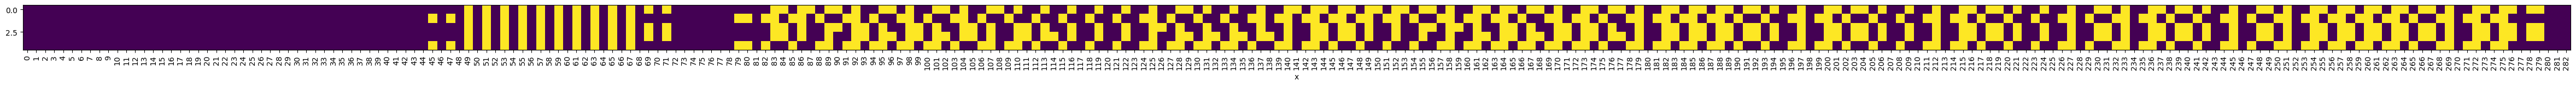

input B:


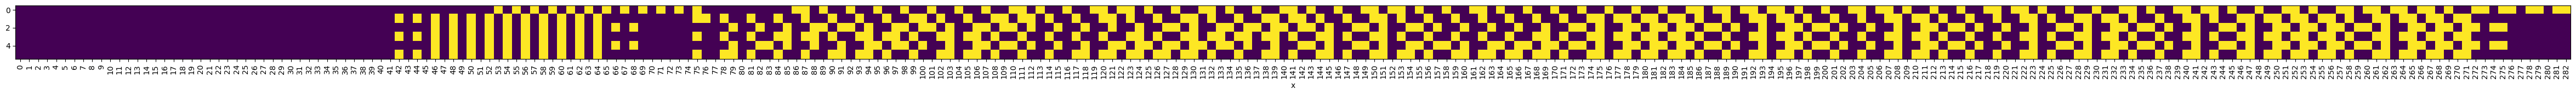

In [194]:
buttonA = string2list(input_binary)
buttonB = string2list(input_binary2)

print("input A:")
draw(buttonA)
print("input B:")
draw(buttonB)

Opakovaná sekvencia
pri každom stlačení sa vyšle signál, chceme zistiť (nájsť, ak existuje) časť signálu, ktorí sa opakuje a je oddelený. Predpokladáme, že je to časť, pomocou ktorej začne zariadenie počúvať a nastaví vnútorné hodiny.  
Môžeme to zistiť dvoma spôsobmi:
    - findSameSignal : vráti danú časť, ak existuje, pre jeden vysielač. Je potrebné, aby obsahoval viacero vyslaných signálov.
    - findSameSignalMulti : vráti danú časť, ak exituje, pre zariadenie s viacerými vysielačmi (tlačidlami), na vstupe sú dva signály vyslané z rovnakého zariadenia ale rôzne tlačidlo bolo stlačené.

Použitie `findSameSignal()`
input A:


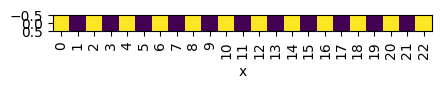

input B:


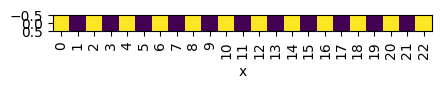

Použitie `findSameSignalMulti()`


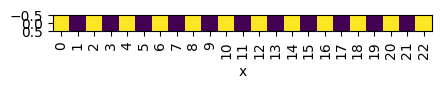

In [195]:
repeatedA = findSameSignal(buttonA)
repeatedB = findSameSignal(buttonB)

print("Použitie `findSameSignal()`")
print("input A:")
draw(repeatedA)
print("input B:")
draw(repeatedB)

print("Použitie `findSameSignalMulti()`")
rovnaké = findSameSignalMulti(buttonA, buttonB)
draw(rovnake)

Analýza opakovanej sekvencie:  
zistili sme, že zariadenie má sekvenciu, ktorá je oddelená a vždy sa nachádza v každom vyslanom signáli. Označíme túto sekvenciu ako inicializačnú, pretože žiadna iná sekvencia zo signálu s rovnakými vlastnosťami sa nenašla.

Po nájdení inicializačnej sekvencie, ktorá je oddelená od zvyšku, pre ďalšiu analýzu nie je potrebná. Preto získame zvyšok.

input A pred:


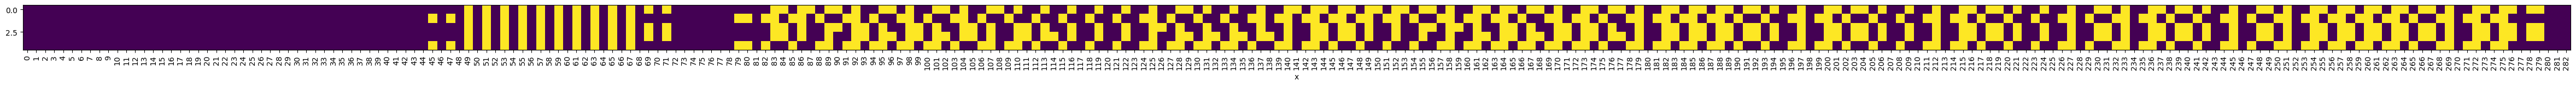

input A po:


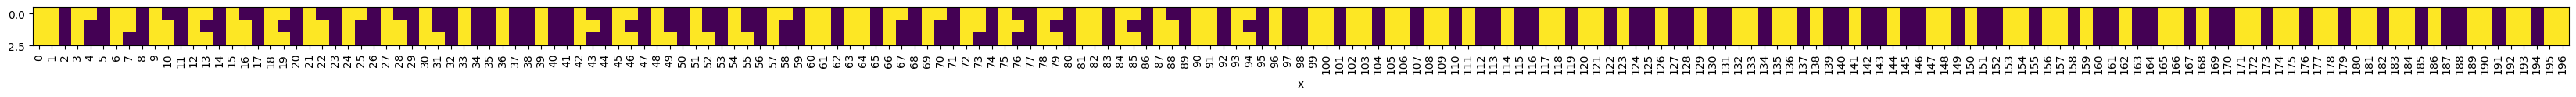

input B pred:


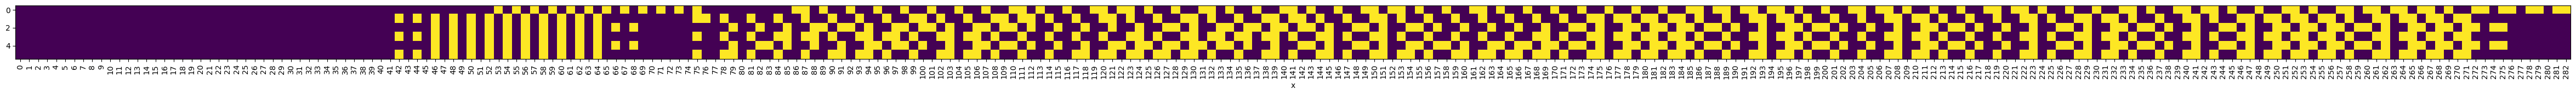

input B po:


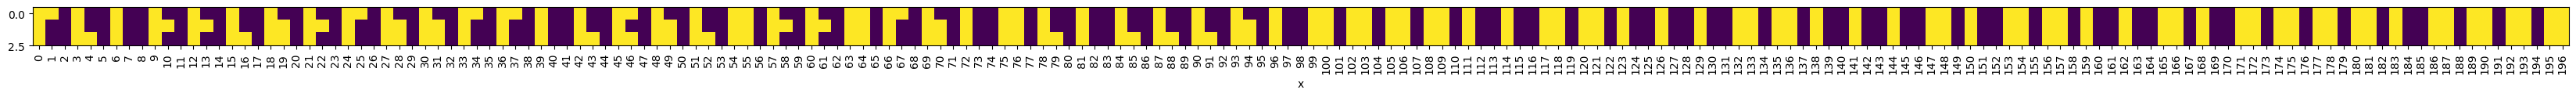

In [196]:
signalA = mySignal(buttonA)
signalB = mySignal(buttonB)

print("input A pred:")
draw(buttonA)
print("input A po:")
draw(signalA)
print("input B pred:")
draw(buttonB)
print("input B po:")
draw(signalB)

Vykreslenie patternu ak existuje. Pattern chápeme ako bity, ktoré sú nezávisle od tlačidla vždy rovnaké pri každom vysielaní, pričom sa opakuje kedy sú bity rovnaké a kedy nie. Bity patternu sú označené 1.

pattern


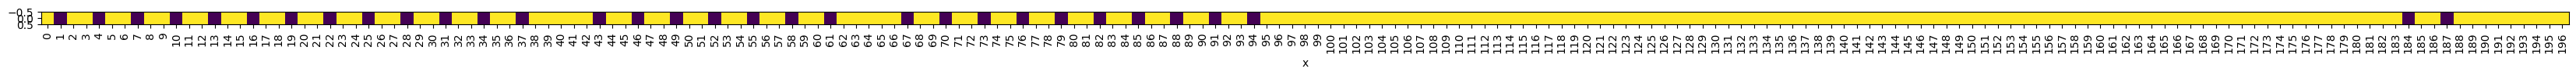

In [197]:
pattern = findPatternMulti(signalA, signalB)
print("pattern")
draw([pattern])

Analýza patternu
vidíme že väčšina bitov je označených ako 1. Môže to byť aj z iného dôvodu, ako súčasť patternu. Preto potrebujeme nájsť danú časť, ktorá sa opakuje a tým vytvára pattern. 

nájdená časť patternu:


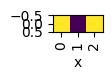

In [198]:
myPattern = findMyPattern(pattern)
#print(myPattern)
print("nájdená časť patternu:")
draw([myPattern])

Reálne dáta 
, po zistení patternu vieme získať reálne dáta. Na to použijeme `getData()`.

signál A pred: 


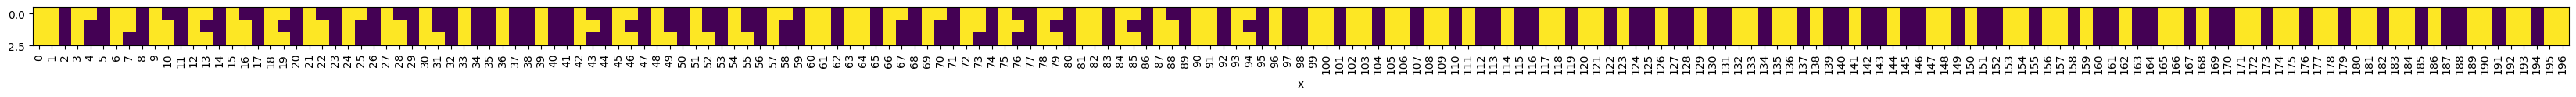

signál A po: 


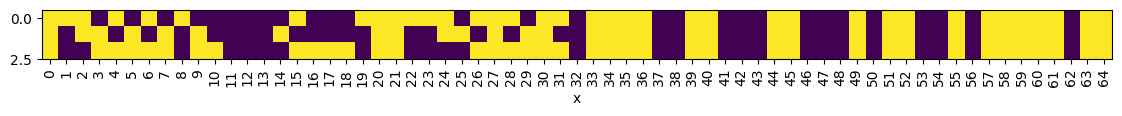

signál B pred: 


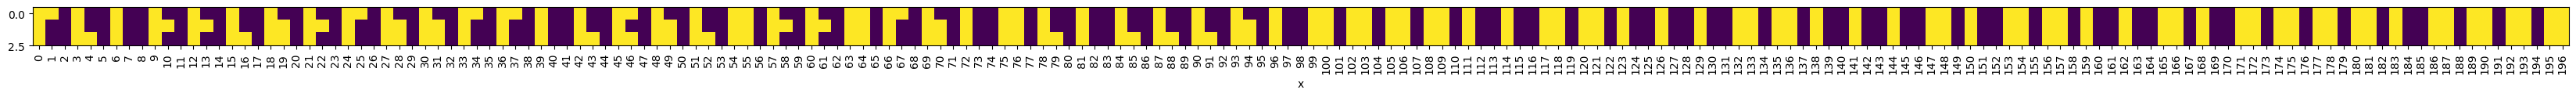

signál B po: 


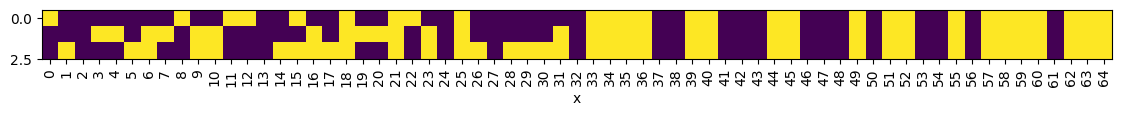

In [199]:
signalAReal = getData(signalA, myPattern)
signalBReal = getData(signalB, myPattern)

print('signál A pred: ')
draw(signalA)

print('signál A po: ')
draw(signalAReal)

print('signál B pred: ')
draw(signalB)

print('signál B po: ')
draw(signalBReal)

Button bit 
nájdenie bitu, ktorí nesie informáciu, ktoré tlačidlo bolo stlačené.

button bity
input A:


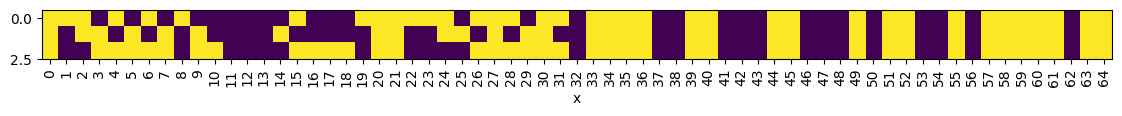

input B:


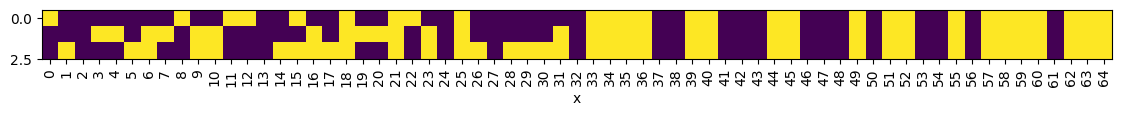

button bit:


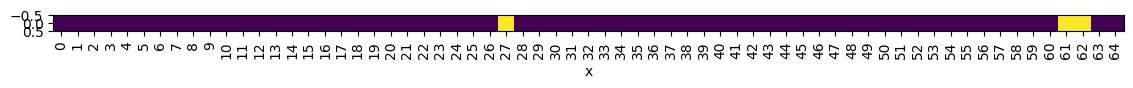

In [200]:
print('button bity')
buttonBit = findButtonBit(signalAReal, signalBReal)
print("input A:")
draw(signalAReal)
print("input B:")
draw(signalBReal)
print("button bit:")
draw([buttonBit])

Analýza - bitton bit
- 27 bit: ak je 1, tak bolo stlačené horné tlačidlo, ak 0, tak dolné tlačidlo
- 61-62 bity: ak bolo stlačené horné tlačidlo tak majú hodnotu 01, inak 10

Separator, id bity
pre bližšie porozumenie formátu vysielaného signálu, zistíme či obsahuje nejaké oddeľovače, ktoré by rozdelili signál a mohli by sme lepšie analyzovať aký účel majú jednotlivé časti. Za oddeľovač pokladáme jeden bit, ktorý je vždy rovnaký nezávisle na stlačenom tlačidle.
Identifikačné bity sú bity, pri ktorých predpokladáme, že majú aspoň dĺžku 2 a sú tiež nezávisle na stlačení rovnaké.

separator
input A:


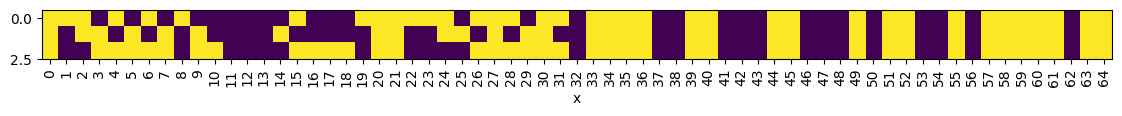

input B:


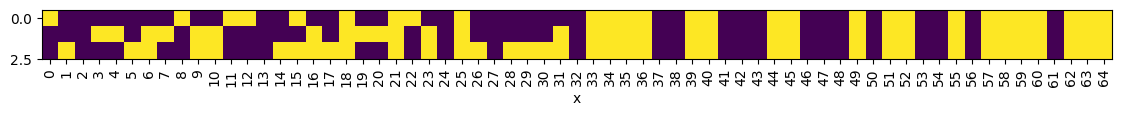

separator bit:


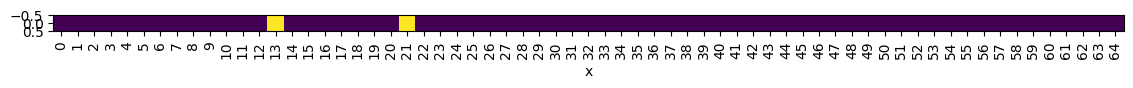

id bit:


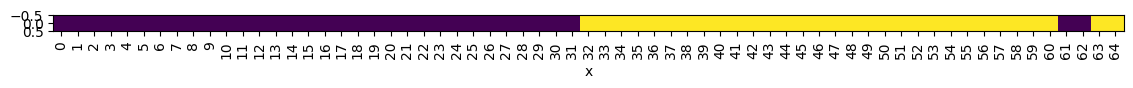

In [201]:
print('separator')
separator, id = findSeparatorId(signalAReal, signalBReal)

print("input A:")
draw(signalAReal)
print("input B:")
draw(signalBReal)
print("separator bit:")
draw([separator])
print("id bit:")
draw([id])


Analýza oddeľovačov a id:
- 13/21 bity - oddeľovače, ktoré rozdeľujú signál na 3 časti.
- 32-60/63-64 - id, vieme, že 61-62 sú bity buttonu. To znamená, že aj identifikátor zariadenia obsahuje informáciu, ktoré tlačidlo bolo stlačené. Z toho môžeme usúdiť, že prijímač vykoná inú operáciu závislú na prijatom identifikátori.

Výsledné vykreslenie formy signálu.

input A:
blue - button, green - separator, grey - id


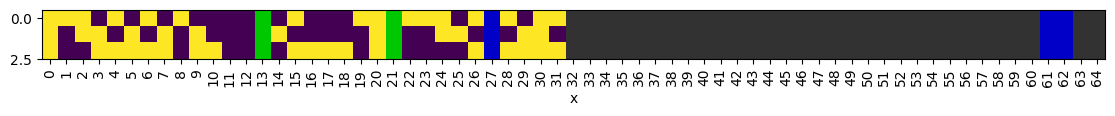

input B:
blue - button, green - separator, grey - id


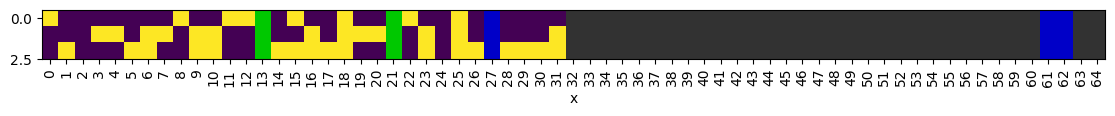

In [202]:
print("input A:")
drawAdv(signalAReal, buttonBit, separator, id)
print("input B:")
drawAdv(signalBReal, buttonBit, separator, id)


Záver analýzy:
zistili sme, že zariadenie s dvomi tlačidlami má formát, ktorý opakuje. 
- 13.bit, 21.bit : oddeľovače
- 27.bit, 61-62.bit : button bity
- 32-60.bit, 63-64.bit (alternatívne 32-64.bit) : identifikátor
Ohľadne ďalších bitov sme zatiaľ nič, bližšie nezistili. Je pravdepodobné, že zariadenie generuje spôsobom nám nezisteným kľúčové bity, t.j. bity s nepriradenou funkciou. 

Hex zápis
, kvôli dĺžke bitov sa nám viac oplatí skrátiť zápis na hexadecimálne z binárneho. V budúcnosti sa bude lepšie analyzovať kratší zápis.

In [203]:
print("hex hodnota")
hexId = binToHex(signalAReal[0], id)
print(hexId)

hex hodnota
0x3cc62cbf


Analýza s pomocou informácií z manuálu - 
podľa manuálu tlačidlá fungujú princípom:
- horné tlačidlo: otvor - zastav - zavri - zastav - otvor - ...
- dolné tlačidlo: zavri - zastav - zavri - zastav - zavri - ... 
 
keďže máme od každého tlačidla tri stlačenia, tak pri dolnom tlačidle by mala existovať sekvencia, ktorá bude rovnaká pri prvom a treťom stlačení a pri druhom bude nadobúdať iné hodnoty. Ak zistíme bity tejto sekvencie tak pri hornom tlačidle by mala nadobúdať rôzne hodnoty.

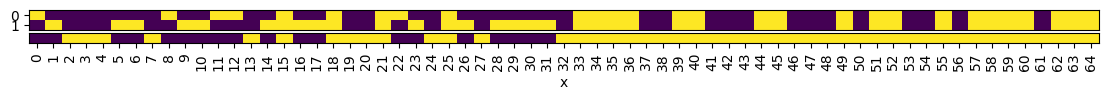

In [204]:
analyseLower = []
analyseLower.append(signalBReal[0])
analyseLower.append(signalBReal[2])
draw(analyseLower, True)

porovnanie 1. a 3. stlačenia dolného tlačidla

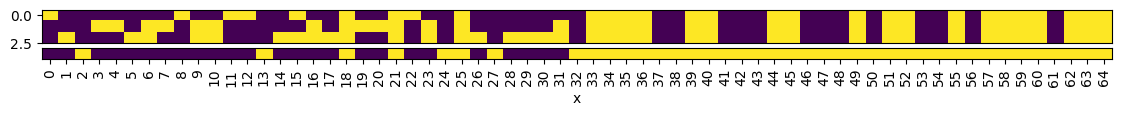

In [205]:
draw(signalBReal, True)

Analýza dolného tlačidla:
1.obrázok hovorí o možných sekvenciách (žlté). Aby sme mohli uvažovať či sú naše hľadané, porovnáme ich s 2.obrázkom a ak nie sú v 2.obrázku označené žltou tak si ich zapíšeme.
- 3-4.bity
- 7.bit
- 15.bit
- 19-20.bity

Ak budú nadobúdať rôzne hodnoty v hornom tlačidle tak pravdepodobnosť, že sú to naše hľadané bity sa zvýši. Avšak isto to nevieme povedať.

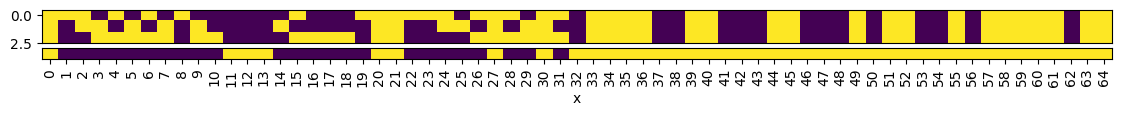

In [206]:
draw(signalAReal, True)

Výsledné bity:
- 3-4.bity
- 7.bit
- 15.bit
- 19.bit

Sekvencie s dĺžkou 1 môžeme zahodiť, pretože 1 bit nadobúda len 2 hodnoty a my potrebujeme, aby boli 3 rôzne hodnoty. Preto nám ostáva sekvencia 3-4.bity. 

Záver zimného semestra:

Získali sme dáta použitím RTL SDR zariadenie s pomocou softvéru GQRX, kde bol vysielaný signál nahratý. Signál pochádza z diaľkového ovládača na garážové dvere používajúci 'fixed + rolling code'. Obsahuje 2 tlačidlá, hodné a dolné, pričom obidve tlačidlá boli tri krát za sebou stlačené. Každé tlačidlo bolo nahraté samostatne. Nahrávky sme otvorili v Universal Radio Hacker, odkiaľ sme získali signáli prevedené na binárny zápis. Každé stlačenie bolo oddelené '\n'. Tým sme získali vstupné dáta pre analýzu. Keďže Universal Radio Hacker nepodporuje funkcie, ktoré sme potrebovali na ďalšiu analýzu, vytvorili sme vlastnú knižnicu pomocou, ktorej sme analyzovali dáta. 
- Zistili sme, že každý bit je 'zabalený' zľava do 1 a sprava do 0. Tým bolo zabezpečené, aby boli za sebou vždy najviac dve jednotky alebo dve nuly. napr. signál 10001 bude 110100100100110

Nasledovné čísla bitov budú z 'odbaleného' signálu, t.j. bez 1 naľavo a 0 napravo. Ľahko by sme vedeli previesť dané čísla na čísla zo 'zabaleného' signálu. n -> (n-1)*3 + 2
- 3-4.bity : predpokladáme, že nesú vlastnosť čo sa má stať s garážovými dvermi. Keďže ale binárny zápis príkazu *zastav* v hornom tlačidle nie je rovnaký ako v dolnom tlačidle, na vykonanie príkazu potrebuje prijímacie zariadenie vedieť, ktoré tlačidlo bolo stlačené.
- 13., 21. bity : bity, ktoré delia signál na časti
- 27.bit, 61-62.bity : bity nesúce informáciu, ktoré tlačidlo bolo stlačené
- 32.-64.bity okrem 61.-62.bitov : identifikačné bity, sú rovnaké nezávisle na tlačidle a počte stlačení.

Ďalšie súvislosti medzi bitmi sme nenašli. Nastávajú pre ne dve možnosti:
1. sú to kľúče zo zoznamu, ktorý má ako vysielač, tak aj prijímač a pomocou zhody sa spustí operácia s dvermi.
2. postupne sa mení hodnota kľúča, podľa vnútornej funkcie, ktorú sme ešte neobjavili.

Letný semester:
Získanie ďalších vzoriek signálov z rôznych zariadení a následné porovnávanie a analyzovanie ich formátov.

`removePart()`
z listu listov, vymaže časť definovaná pomocou začiatočnej, konečnej pozície a na ktorej/ktorých sekvenciách/listoch. Vráti upravený list listov.

Cieľ: vymazanie nepotrebných častí.

In [207]:
def removePart(zoz: list, fromBit: int, toBit: int, seqNum: list) -> list:
    """
    Vráti list bez ohraničenej časti 

    Argumenty:
        `zoz` -> list listov
        `fromBit` ->prvý bit, od ktorého budú vymazané bity - bude vymazaný
        `toBit` -> posledný bit, ktorý bude vymazaný
        `seqNum` -> zoznam sekvencii v ktorých sa má odstránenie vykonať
    
    Výsledok:
        upravený list listov
    """
    
    fin = []

    for i in range(0, len(zoz)):
        if i not in seqNum:
            fin.append(zoz[i])
            continue
        pom = []
        for j in range(0, len(zoz[i])):
            if j < fromBit or toBit < j:
                pom.append(zoz[i][j])
        fin.append(pom)

    return fin

In [208]:
pr = [[1, 0, 1, 1, 0], [0, 0, 0, 1, 1, 0, 0, 1]]
novy = removePart(pr, 0, 2, [1])
print("pred: " + str(pr))
print("po: " + str(novy))

pred: [[1, 0, 1, 1, 0], [0, 0, 0, 1, 1, 0, 0, 1]]
po: [[1, 0, 1, 1, 0], [1, 1, 0, 0, 1]]


`getPart()`
použijeme na vybratie konkrétneho úseku z listu listov. Tiež definovaná pomocou začiatočnej, konečnej pozície a konkrétneho listu/listov.

Cieľ: získanie ohraničenej časti dát

In [209]:
def getPart(zoz: list, fromBit: int, toBit: int, seqNum: list) -> list:
    """
    Vráti list ohraničenej časti 

    Argumenty:
        `zoz` -> list listov
        `fromBit` ->prvý bit, od ktorého budú vybraté bity
        `toBit` -> posledný bit, ktorý bude vybraté
        `seqNum` -> zoznam sekvencii v ktorých sa má vybratie vykonať
    
    Výsledok:
        upravený list listov
    """
    
    fin = []

    for i in range(0, len(zoz)):
        if i not in seqNum:
            continue
        pom = []
        for j in range(0, len(zoz[i])):
            if fromBit <= j and j <= toBit :
                pom.append(zoz[i][j])
        fin.append(pom)

    return fin

In [210]:
pr = [[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]]
novy = [getPart(pr, 5, len(pr[0])-1,[0])[0], getPart(pr, 9, len(pr[1])-1, [1])[0]]
print("pred: " + str(pr))
print("po: " + str(novy))

pred: [[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]]
po: [[1, 0, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 0, 1, 0, 1, 1]]


`removeSequence()`
na odstránenie zoznamu konkrétnych sekvencií/listov z listu listov

Cieľ: odstráni celé sekvencie zo záznamu dát

In [211]:
def removeSequence(zoz: list, num: list) -> list:
    """
    Vráti signál bez danej sekvencie

    Argumenty:
        `zoz` -> list listov
        `num` -> číslo danej sekvencie 0 až n-1, kde n je počet elementov v zoz
    
    Výsledok:
        `zoz` -> výsledný list bez danej sekvencie
    """
    fin = []
    for i in range(0, len(zoz)):
        if i not in num:
            fin.append(zoz[i])
    
    return fin

pred: 


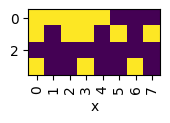

po: 


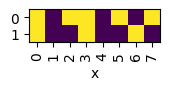

In [212]:
pr = [[1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 1, 0, 1], [0, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0]]
novy = removeSequence(pr, [0, 2])
print("pred: ")
draw(pr)
print("po: ")
draw(novy)